# 09 Translação periódica

Uma decisão inerente aos operadores de vizinhança é sobre o que fazer com os pixels que estão nas primeiras e últimas linhas e colunas, pois a vizinhança destes pixels extrapola a região da imagem. Existem inúmeras soluções que tratam disto. As duas mais comuns são:

1. Supor que as imagens são infinitas e fora da imagem todos os pixels são zerados.
2. Supor que a imagem se repete nos ladrilhos de uma parede infinita.

O primeiro caso é o mais utilizado quando fazemos a filtragem no domínio do espaço (convolução linear). O segundo caso é necessário quando queremos realizar a filtragem no domínio da frequência, ou seja, utilizando a à Transformada Discreta de Fourier. Neste caso, as imagens são modeladas como periódicas e as translações associadas também são todas periódicas. 

Existem três versões básicas em que podemos implementar a translação periódica:

## 1. Criando réplicas

Podemos obter a translação periódica replicando-se a imagem 4 vezes e extraindo uma janela do mesmo tamanho da imagem original porém transladada 

In [1]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import numpy as np

(<matplotlib.image.AxesImage at 0x7f8ebfc89030>,
 Text(0.5, 1.0, 'f periodicamente translada por (-30,-80)'))

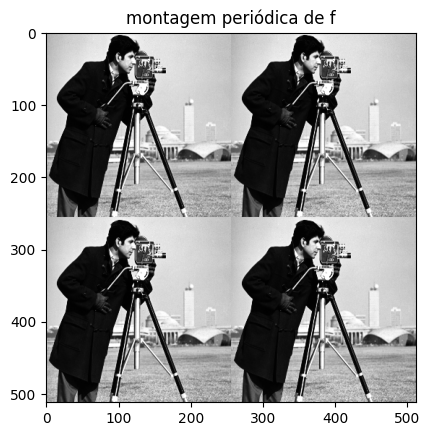

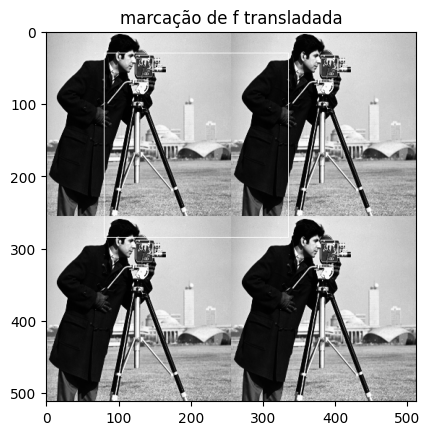

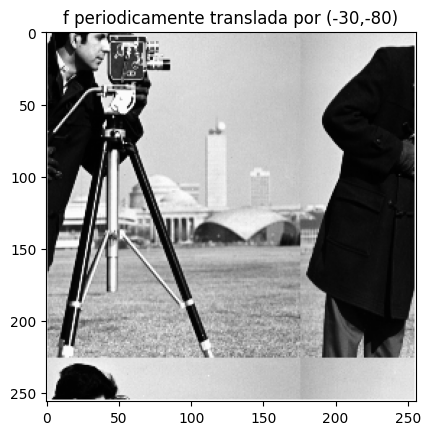

In [2]:
f = mpimg.imread('../data/cameraman.tif')
plt.imshow(f,cmap='gray'),plt.title('original')
H,W = f.shape
dh,dw = (-30,-80)
dhi = (-dh + H) % H # mapeamento inverso igual feito em iaffine (inversa de T)
dwi = (-dw + W) % W # mapeamento inverso
f2 = np.vstack((f,f))
f4 = np.hstack((f2,f2))
plt.figure(1)
plt.imshow(f4,cmap='gray'), plt.title('montagem periódica de f')
f4[dhi:dhi+H,dwi    ] = 255
f4[dhi:dhi+H,dwi+W-1] = 255
f4[dhi    ,dwi:dwi+W] = 255
f4[dhi+H-1,dwi:dwi+W] = 255
plt.figure(2)
plt.imshow(f4,cmap='gray'), plt.title('marcação de f transladada')
g = f4[dhi:dhi+H,dwi:dwi+W]
plt.figure(3)
plt.imshow(g,cmap='gray'), plt.title('f periodicamente translada por (%d,%d)' % (dh,dw))

## 2. Usando indexação 

Também é possível realizar a translação periódica usando indexação por arrays. A operação que permite a periodicidade no cálculo dos índices é o **módulo**, implementado pelo operador **%** do NumPy. Esta é a forma que a função está implementada na toolbox *ia898*: [ptrans](../src/ptrans.ipynb).



In [3]:
def ptrans(f,t):
    import numpy as np
    g = np.empty_like(f) 
    if f.ndim == 1:
      W = f.shape[0]
      col = np.arange(W)
      g = f[(col-t)%W]
    elif f.ndim == 2:
      H,W = f.shape
      rr,cc = t
      row,col = np.indices(f.shape)
      g = f[(row-rr)%H, (col-cc)%W]
    elif f.ndim == 3:
      Z,H,W = f.shape
      zz,rr,cc = t
      z,row,col = np.indices(f.shape)
      g = f[(z-zz)%Z, (row-rr)%H, (col-cc)%W]
    return g

In [4]:
def ptrans2d(f,t):
    rr,cc = t
    H,W = f.shape
    
    r = rr%H
    c = cc%W
        
    g = np.empty_like(f)
    
    g[:r,:c] = f[H-r:H,W-c:W]
    g[:r,c:] = f[H-r:H,0:W-c]
    g[r:,:c] = f[0:H-r,W-c:W]
    g[r:,c:] = f[0:H-r,0:W-c]

    return g


Text(0.5, 1.0, 'Cameraman periodically translated')

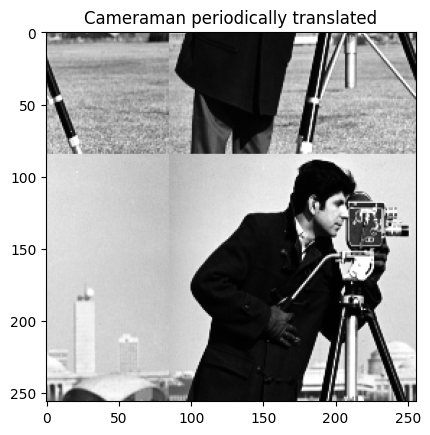

In [5]:
f = mpimg.imread('../data/cameraman.tif')
f5=ptrans(f, np.array(f.shape)//3)
plt.imshow(f,cmap='gray')
plt.title('Original 2D image - Cameraman')
plt.imshow(f5,cmap='gray')
plt.title('Cameraman periodically translated')


## 3. Usando slicing

Existe uma terceira forma de implementar que é fatiar a imagem em 4 sub-regiões retangulares e reposicioná-las para gerar a imagem periodicamente transladada. 